<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/bookAurelienGeron/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# **Zbiór danych MNIST**

In [ ]:
print("Imoportuję zbiór danych MNIST")
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
print("Wyświetlam klucze")
mnist.keys()

Imoportuję zbiór danych MNIST
Wyświetlam klucze


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
print("Sam wyświetlam zawartości kluczy")
print("Dane, czyli wiersze zawierające po 784 liczby każda od 0 (biały) do 255 (czarny)")
print(mnist["data"])
print("\nTargety, inaczej labele")
print(mnist["target"])
print("\nOpis danych")
print(mnist["DESCR"])
print("\nNazwy atrybutów")
print(mnist['feature_names'])
print("\nNazwy targetów")
print(mnist['target_names'])

Sam wyświetlam zawartości kluczy
Dane, czyli wiersze zawierające po 784 liczby każda od 0 (biały) do 255 (czarny)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Targety, inaczej labele
['5' '0' '4' ... '4' '5' '6']

Opis danych
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts o

In [ ]:
print("Przypisuję dane i targety do zmiennych X i y")
X, y = mnist["data"], mnist["target"]
print("Rozmiar X:", X.shape)
print("Typ X:", type(X))
print("Rozmiar y:", y.shape)
print("Typ y:", type(y))

Przypisuję dane i targety do zmiennych X i y
Rozmiar X: (70000, 784)
Typ X: <class 'numpy.ndarray'>
Rozmiar y: (70000,)
Typ y: <class 'numpy.ndarray'>


Zamiana pierwszego wiersza na obrazek
Saving figure some_digit_plot


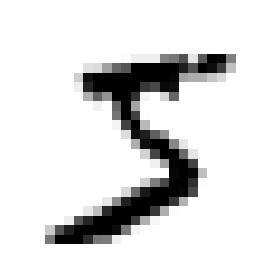

In [ ]:
print("Zamiana pierwszego wiersza na obrazek")
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]  # przykładowa liczba (akurat pierwsza w zbiorze)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off") # wyłącza osie

save_fig("some_digit_plot")
plt.show()

In [ ]:
print("Wyświetlenie targetu (etykiety), która jest stringiem")
print(y[0])
print(type(y[0]))

Wyświetlenie targetu (etykiety), która jest stringiem
5
<class 'str'>


In [ ]:
print("Zamiana kolumny etykiet ze stringów na 8-bitowy int bez znaku, czyli od 0 do 255")
y = y.astype(np.uint8)
print(type(y[0]))

Zamiana kolumny etykiet ze stringów na 8-bitowy int bez znaku, czyli od 0 do 255
<class 'numpy.uint8'>


In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
print("Definiowanie funkcji rysującej wiele cyfr (obrazek ze str 107)")

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Definiowanie funkcji rysującej wiele cyfr (obrazek ze str 107)


Rysowanie cyfr
Saving figure more_digits_plot


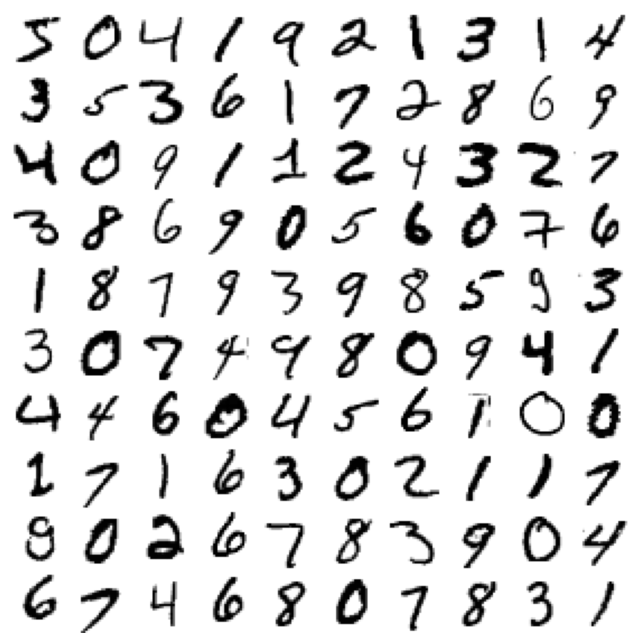

In [ ]:
print("Rysowanie cyfr")

plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [ ]:
print("Dzielę dane na zbiór treningowy i testowy. One są już podzielone wartstwowo do 60000 przykładu")
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print("Sam sprawdzam wymiary nowych zbiorów")
print("Wymiar X_train", X_train.shape)
print("Wymiar X_test", X_test.shape)
print("Wymiar y_train", y_train.shape)
print("Wymiar y_test", y_test.shape)

Dzielę dane na zbiór treningowy i testowy. One są już podzielone wartstwowo do 60000 przykładu
Sam sprawdzam wymiary nowych zbiorów
Wymiar X_train (60000, 784)
Wymiar X_test (10000, 784)
Wymiar y_train (60000,)
Wymiar y_test (10000,)


# **Uczenie klasyfikatora binarnego**

In [ ]:
print("Klasyfikator binarny wykrywa piątki i niepiątki.")
print("Ze zbioru y_train wybieram True dla 5 i False dla nie5")
y_train_5 = (y_train == 5)  # wartość True dla piątek, a False dla pozostałych
print("y_train_5 =", y_train_5)
print("Ze zbioru y_test wybieram True dla 5 i False dla nie5")
y_test_5 = (y_test == 5)
print("y_test_5 =", y_test_5)

Klasyfikator binarny wykrywa piątki i niepiątki.
Ze zbioru y_train wybieram True dla 5 i False dla nie5
y_train_5 = [ True False False ...  True False False]
Ze zbioru y_test wybieram True dla 5 i False dla nie5
y_test_5 = [False False False ... False  True False]


In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
print("Note: some hyperparameters will have a different defaut value in future versions of Scikit-Learn,")
print("such as max_iter and tol. To be future-proof, we explicitly set these hyperparameters to their future default values.")
print("For simplicity, this is not shown in the book.")

Note: some hyperparameters will have a different defaut value in future versions of Scikit-Learn,
such as max_iter and tol. To be future-proof, we explicitly set these hyperparameters to their future default values.
For simplicity, this is not shown in the book.


In [ ]:
print("Klasyfikator stochastycznego spadku wzdłuż gradientu (stochastic gradient descent SGD)")

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

Klasyfikator stochastycznego spadku wzdłuż gradientu (stochastic gradient descent SGD)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print("Sam wyświetlam pierwszy wiersz w danych some_digit = X[0]")
some_digit_as_list = some_digit.tolist()
counter = 0
for element in some_digit_as_list:
    print(element, end=" ")
    counter += 1
    if counter % 28 == 0:
        print()
print("\nWykrywa cyfrę 5 w zbiorze danych some_digit = X[0], czyli pierwszy wiersz z danych")
sgd_clf.predict([some_digit])
print("Wyszło True czyli tutaj miał rację, bo tam była rzeczywiście 5")

Sam wyświetlam pierwszy wiersz w danych some_digit = X[0]
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 18.0 18.0 18.0 126.0 136.0 175.0 26.0 166.0 255.0 247.0 127.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 30.0 36.0 94.0 154.0 170.0 253.0 253.0 253.0 253.0 253.0 225.0 172.0 253.0 242.0 195.0 64.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 49.0 238.0 253.0 253.0 253.0 253.0 253.0 253.0 253.0 253.0 251.0 93.0 82.0 82

In [ ]:
print("Sam sprawdzam dla pozostałych.")
# print("Kolumna targetów (labels) ")
# counter = 0
# for label in y_train:
#     print(label, end='')
#     counter += 1
#     if counter % 100 == 0:
#         print()

print("Kolumna targetów (labeli), w której 5 są zamienione na True, a nie5 na False")
print(y_train_5)

print("[y[0], y[1], y[2]] =", [y[0], y[1], y[2]])
print("Przewiduję czy liczba jest 5 czy nie jest dla trzech pierwszych wierszy")
print(sgd_clf.predict([X[0], X[1], X[2]]))
print("Przewiduję czy liczba jest 5 czy nie jest dla wszystkich wierszy z X_train")
print(sgd_clf.predict(X_train))

print("Sprawdzam czy dla każdego elementu mamy dobrze sklasyfikowaną cyfrę")
print(y_train_5 == sgd_clf.predict(X_train))
print("Ale czy dla każdego jest ok?")
print((y_train_5 == sgd_clf.predict(X_train)).all())

table_of_True_False = (y_train_5 == sgd_clf.predict(X_train))
list_of_True_False = table_of_True_False.tolist()
print("Ilość True to:")
amount_of_good_predictions = list_of_True_False.count(True)
print(amount_of_good_predictions)
print("Ilość False to:")
amount_of_bad_predictions = list_of_True_False.count(False)
print(amount_of_bad_predictions)
print("Czyli w", amount_of_bad_predictions, "przypadkach model się pomylił.")

Sam sprawdzam dla pozostałych.
Kolumna targetów (labeli), w której 5 są zamienione na True, a nie5 na False
[ True False False ...  True False False]
[y[0], y[1], y[2]] = [5, 0, 4]
Przewiduję czy liczba jest 5 czy nie jest dla trzech pierwszych wierszy
[ True False False]
Przewiduję czy liczba jest 5 czy nie jest dla wszystkich wierszy z X_train
[ True False False ...  True False False]
Sprawdzam czy dla każdego elementu mamy dobrze sklasyfikowaną cyfrę
[ True  True  True ...  True  True  True]
Ale czy dla każdego jest ok?
False
Ilość True to:
57136
Ilość False to:
2864
Czyli w 2864 przypadkach model się pomylił.


# **Miary wydajności**

## **Pomiar dokładności za pomocą sprawdzianu krzyżowego**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
print("Inna implementacja sprawdzianu krzyżowego")

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

Inna implementacja sprawdzianu krzyżowego
0.9669
0.91625
0.96785


In [ ]:
print("Klasyfikator obrazów niebędących piątkami")

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        # macierz o wartościach False o wymiarach len(X) wierszy na 1 kolumnę. Po co ona?
        return np.zeros((len(X), 1), dtype=bool)  

Klasyfikator obrazów niebędących piątkami


In [ ]:
print("Przykładowa macierz")
print(np.zeros((5,3), dtype=int))
print(np.zeros((5,3), dtype=bool))

Przykładowa macierz
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]]


In [ ]:
never_5_clf = Never5Classifier()
# musi być scoring, bo w estymatorze Never5Classifier() nie ma metody score
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## **Macierz pomyłek**

In [ ]:
print("Najpierw zbiór prognoz dla każdego podzbioru testowego (czemu jest tylko jedna lista zwracana skoro 3 kroswalidacje)")

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print("Tak wyglądają prognozy")
print(y_train_pred)

Najpierw zbiór prognoz dla każdego podzbioru testowego (czemu jest tylko jedna lista zwracana skoro 3 kroswalidacje)
Tak wyglądają prognozy
[ True False False ...  True False False]


In [ ]:
print("Typ y_train_pred", type(y_train_pred))
print("Długość wektora prognoz o elementach True False")
print(len(y_train_pred))
print("Długość wekotra rzeczywistych wyników o elementach True False")
print(len(y_train_5))

Typ y_train_pred <class 'numpy.ndarray'>
Długość wektora prognoz o elementach True False
60000
Długość wekotra rzeczywistych wyników o elementach True False
60000


In [ ]:
print("Macierz pomyłek dla klas docelowych y_train_5 i przewidywanych y_train_pred")

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

Macierz pomyłek dla klas docelowych y_train_5 i przewidywanych y_train_pred


array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
print("Udajemy że uzyskaliśmy perfekcyjne wyniki i wtedy nie ma błędów FP i FN")

y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

Udajemy że uzyskaliśmy perfekcyjne wyniki i wtedy nie ma błędów FP i FN


array([[54579,     0],
       [    0,  5421]])

## **Precyzjna i pełność**

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precyzja:", precision_score(y_train_5, y_train_pred))  # == PP/(PP+FP)=3530/(3530+687)
cm = confusion_matrix(y_train_5, y_train_pred)  # jeszcze raz macierz pomyłek
print("Precyzja liczona na piechotę:", cm[1, 1] / (cm[0, 1] + cm[1, 1]))
print("Pełność:", recall_score(y_train_5, y_train_pred))  # == PP/(PP+FN)=3530/(3530+1891)
print("Pełność liczona na piechotę:", cm[1, 1] / (cm[1, 0] + cm[1, 1]))

Precyzja: 0.8370879772350012
Precyzja liczona na piechotę: 0.8370879772350012
Pełność: 0.6511713705958311
Pełność liczona na piechotę: 0.6511713705958311


In [ ]:
from sklearn.metrics import f1_score

print("Wynik F1")
print(f1_score(y_train_5, y_train_pred))

print("Wynik F1 liczony na piechotę")
print(cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2))

Wynik F1
0.7325171197343846
Wynik F1 liczony na piechotę
0.7325171197343847


## **Kompromis pomiędzy precyzją a pełnością**

In [ ]:
print("Metoda decision_function() podaje wynik dla danej próbki. Na przykład dla wyniku 1500,")
print("jeśli próg decyzyjny wynosi 0, to zakwalifikuje jako wynik pozytywny bo więcej niż próg.")
print("some_digit=X[0] to pierwszy element, czyli była 5, bo")
print("y[0] =", y[0])
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
print("Próg decyzyjny threshold = 0")
threshold = 0  # próg decyzyjny
y_some_digit_prediction = (y_scores > threshold)
print("Czy liczba jest równa 5 (przy progu 0)", y_some_digit_prediction)

print("\nKlasyfikator SGDClassifier korzysta z progu 0. Dlatego z metody predict() wyjdzie to samo")
print(sgd_clf.predict([some_digit]))

print("\nPróg decyzyjny threshold = 8000")
threshold = 8000  # próg decyzyjny większy
y_some_digit_prediction = (y_scores > threshold)
print("Czy liczba jest równa 5 (przy progu 8000)", y_some_digit_prediction)

print("Z powrotem próg 0")
threshold = 0

print("\nKilka moich początkowych X[0], X[1], X[2]")
moje_y_scores = sgd_clf.decision_function([X[0], X[1], X[2]])
print(moje_y_scores)
print("A więc powinna tylko pierwsza cyfra być 5, bo pozostałe mają wartość mniejszą niż próg decyzyjny 0")
moje_y_some_digit_prediction = (moje_y_scores > threshold)
print("Czy liczby są równe 5", moje_y_some_digit_prediction)
print("Sprawdzenie y[0] =", y[0], ", y[1] =", y[1], ", y[2] =", y[2])

Metoda decision_function() podaje wynik dla danej próbki. Na przykład dla wyniku 1500,
jeśli próg decyzyjny wynosi 0, to zakwalifikuje jako wynik pozytywny bo więcej niż próg.
some_digit=X[0] to pierwszy element, czyli była 5, bo
y[0] = 5
[2164.22030239]
Próg decyzyjny threshold = 0
Czy liczba jest równa 5 (przy progu 0) [ True]

Klasyfikator SGDClassifier korzysta z progu 0. Dlatego z metody predict() wyjdzie to samo
[ True]

Próg decyzyjny threshold = 8000
Czy liczba jest równa 5 (przy progu 8000) [False]
Z powrotem próg 0

Kilka moich początkowych X[0], X[1], X[2]
[  2164.22030239  -5897.37359354 -13489.14805779]
A więc powinna tylko pierwsza cyfra być 5, bo pozostałe mają wartość mniejszą niż próg decyzyjny 0
Czy liczby są równe 5 [ True False False]
Sprawdzenie y[0] = 5 , y[1] = 0 , y[2] = 4


In [ ]:
print("Chcę otrzymać wyniki decyzyjne (zamiast prognoz tak jak wtedy).")
print("Dlatego method wybieram decision_function")
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

print("Tak wyglądają wyniki decyzyjne (gdy większe niż próg=0 to klasyfikuje jako pozytywny, tzn jest 5)")
print(y_scores)

Chcę otrzymać wyniki decyzyjne (zamiast prognoz tak jak wtedy).
Dlatego method wybieram decision_function
Tak wyglądają wyniki decyzyjne (gdy większe niż próg=0 to klasyfikuje jako pozytywny, tzn jest 5)
[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


Mając wyniki decyzyjne można obliczyć precyzję i pełność dla wszystkich progów
używając precision_recall_curve()

Wyświetlam:
precisions
[0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ]
recalls
[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
thresholds
[-106527.45300471 -105763.22240074 -105406.2965229  ...   38871.26391927
   42216.05562787   49441.43765905]
Wykres precyzji i pełności w funkcji progu decyzyjnego

Potrzebne do zaznaczenia na wykresie czerwonych przerywanych linii
recall_90_precision
0.4799852425751706
threshold_90_precision
3370.0194991439557
Saving figure precision_recall_vs_threshold_plot


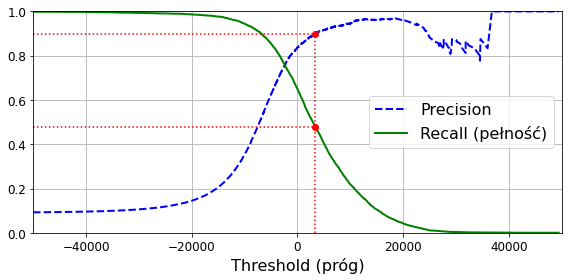

In [ ]:
print("Mając wyniki decyzyjne można obliczyć precyzję i pełność dla wszystkich progów")
print("używając precision_recall_curve()")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

print("\nWyświetlam:")
print("precisions")
print(precisions)
print("recalls")
print(recalls)
print("thresholds")
print(thresholds)

print("Wykres precyzji i pełności w funkcji progu decyzyjnego")

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall (pełność)", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold (próg)", fontsize=16)        # Not shown in the book
    plt.grid(True)                              # Not shown in the book
    plt.axis([-50000, 50000, 0, 1])             # Not shown in the book


print("\nPotrzebne do zaznaczenia na wykresie czerwonych przerywanych linii")
print("recall_90_precision")
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
print(recall_90_precision)
print("threshold_90_precision")
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)

plt.figure(figsize=(8, 4))                                                                  # Not shown in the book
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown in the book
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown in the book
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown in the book
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown in the book
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown in the book
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown in the book
plt.show()

In [ ]:
print("y_train_pred")
print(y_train_pred)
print()
print("y_scores czyli wyniki funkcji decyzyjnej dla całego X_train (jeśli dodatnie to jako True)")
print(y_scores)
print()
print("Obie listy y_train_pred i y_scores powstały z funkcji cross_val_predict więc muszą mieć odpowiadające sobie wartości.")
print("Sprawdzam czy WSZĘDZIE tam gdzie jest True to mamy wartość dodatnią, a tam gdzie False wartość ujemną.")
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
(y_train_pred == (y_scores > 0)).all()

y_train_pred
[ True False False ...  True False False]

y_scores czyli wyniki funkcji decyzyjnej dla całego X_train (jeśli dodatnie to jako True)
[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]

Obie listy y_train_pred i y_scores powstały z funkcji cross_val_predict więc muszą mieć odpowiadające sobie wartości.
Sprawdzam czy WSZĘDZIE tam gdzie jest True to mamy wartość dodatnią, a tam gdzie False wartość ujemną.


True

Wykres precyzji w funkcji pełności
Saving figure precision_vs_recall_plot


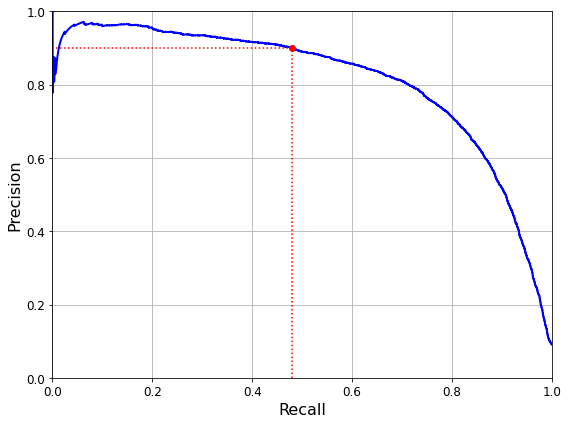

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb

print("Wykres precyzji w funkcji pełności")
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])  # zakres osi x od 0 do 1 oraz osi y od 0 do 1
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [ ]:
print("Mój wstęp dla lepszego zrozumienia.")
print("precisions")
print(precisions)
print()
print("np.argmax(precisions)")
print(np.argmax(precisions))
print()
print("precisions[59961]")
print(precisions[59961])
print()
print("precisions[59966]")
print(precisions[59966])
print()
print("precisions[0]")
print(precisions[0])
print()
print("Wywołanie precisions[59967] powoduje błąd index 59967 is out of bounds for axis 0 with size 59967")
# print(precisions[59967])
print()
print("Wygląda na to, że funkcja precision_recall_curve używa pomocniczych indeksów od 0 do 59966.")
print("Znajdźmy pierwszy pomocniczy indeks, dla którego precisions >= 0.90")
print("np.argmax(precisions >= 0.90)")
print(np.argmax(precisions >= 0.90))
print()
print("Znajdźmy wartość progu dla tego indeksu")
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)
print()
print("Sprawdzenie na piechotę wartości tego progu")
print(thresholds[57075])
print()
print("Spr prognozy w zbiorze uczącym, czyli zwraca True jeśli wynik funkcji decyzyjnej")
print("dla danego wiersza jest większy od progu threshold_90_precision równego 3370")
y_train_pred_90 = (y_scores > threshold_90_precision)
print(y_train_pred_90)
print("Jak widać tej pierwszej piątki nie uznał jako 5, bo jest False")
print(y_train[0])
print()
print("Precyzja prognoz")
print(precision_score(y_train_5, y_train_pred_90))
print()
print("Pełność prognoz")
print(recall_score(y_train_5, y_train_pred_90))

Mój wstęp dla lepszego zrozumienia.
precisions
[0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ]

np.argmax(precisions)
59961

precisions[59961]
1.0

precisions[59966]
1.0

precisions[0]
0.0904012273621719

Wywołanie precisions[59967] powoduje błąd index 59967 is out of bounds for axis 0 with size 59967

Wygląda na to, że funkcja precision_recall_curve używa pomocniczych indeksów od 0 do 59966.
Znajdźmy pierwszy pomocniczy indeks, dla którego precisions >= 0.90
np.argmax(precisions >= 0.90)
57075

Znajdźmy wartość progu dla tego indeksu
3370.0194991439557

Sprawdzenie na piechotę wartości tego progu
3370.0194991439557

Spr prognozy w zbiorze uczącym, czyli zwraca True jeśli wynik funkcji decyzyjnej
dla danego wiersza jest większy od progu threshold_90_precision równego 3370
[False False False ...  True False False]
Jak widać tej pierwszej piątki nie uznał jako 5, bo jest False
5

Precyzja prognoz
0.9

Pełność prognoz
0.47980077476480354


## **Wykres krzywej ROC**

In [ ]:
print("Przypomnienie: y_scores czyli wyniki funkcji decyzyjnej dla całego X_train. Jeśli większe od 0 to True.")
print("Przypomnienie: y_train_5 czyli wartości True-False dla całego X_train mówiące czy to 5 czy nie5.")
from sklearn.metrics import roc_curve
print("Funkja roc_curve oczekuje etykiet i wyników.")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Przypomnienie: y_scores czyli wyniki funkcji decyzyjnej dla całego X_train. Jeśli większe od 0 to True.
Przypomnienie: y_train_5 czyli wartości True-False dla całego X_train mówiące czy to 5 czy nie5.
Funkja roc_curve oczekuje etykiet i wyników.


Wykres OPP (odsetek prawdziwie pozytywnych) w funkcji OFP (odsetek fałszywie pozytywnych)
Saving figure roc_curve_plot


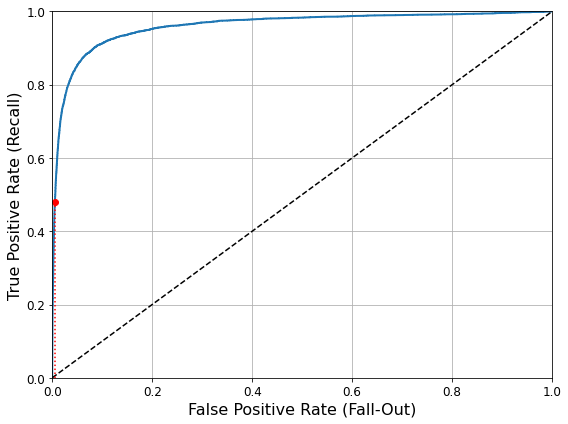

In [ ]:
print("Wykres OPP (odsetek prawdziwie pozytywnych) w funkcji OFP (odsetek fałszywie pozytywnych)")
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    # oś x od 0 do 1 i oś y od 0 do 1
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    # linie siatki
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [ ]:
print("Pole wykresu pod krzywą ROC czyli AUC (area under the curve)")
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

Pole wykresu pod krzywą ROC czyli AUC (area under the curve)


0.9604938554008616

In [ ]:
print("Note: we set n_estimators=100 to be future-proof since this will be the default value in Scikit-Learn 0.22.")
print("Wyuczamy klasyfikator RandomForestClassifier i porównujemy z SGDClassifier. Zamiast funkcji decision_function()")
print("ma on predict_proba(), która zwraca tablicę, w której każdy wiersz to próbka a kolumna to klasa.")
print("Wyliczone są p-twa przynależności danego przykładu do określonej klasy (np 70% szans, że dana próbka jest piątką).")
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

print()
print("y_probas_forest dla każdej próbki (wiersza) zwraca dwa p-twa. Pierwsze, że to nie5 a drugie że to 5.")
print(y_probas_forest)
print("Ilość wierszy (próbek)", len(y_probas_forest))

Note: we set n_estimators=100 to be future-proof since this will be the default value in Scikit-Learn 0.22.
Wyuczamy klasyfikator RandomForestClassifier i porównujemy z SGDClassifier. Zamiast funkcji decision_function()
ma on predict_proba(), która zwraca tablicę, w której każdy wiersz to próbka a kolumna to klasa.
Wyliczone są p-twa przynależności danego przykładu do określonej klasy (np 70% szans, że dana próbka jest piątką).

y_probas_forest dla każdej próbki (wiersza) zwraca dwa p-twa. Pierwsze, że to nie5 a drugie że to 5.
[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.02 0.98]
 [0.92 0.08]
 [0.94 0.06]]
Ilość wierszy (próbek) 60000


In [ ]:
print("Funkja roc_curve oczekuje etykiet i wyników, ale zamiast wyników można użyć p-twa") 
print("przynależności do klasy pozytywnej (jako wyniku).")
print("y_scores_forest to wynik czyli p-two przynależności do klasy pozytywnej")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

print()
print("Sprawdzam czym są te listy")
print("fpr_forest")
print(fpr_forest)
print()
print("tpr_forest")
print(tpr_forest)
print()
print("thresholds_forest")
print(thresholds_forest)

Funkja roc_curve oczekuje etykiet i wyników, ale zamiast wyników można użyć p-twa
przynależności do klasy pozytywnej (jako wyniku).
y_scores_forest to wynik czyli p-two przynależności do klasy pozytywnej

Sprawdzam czym są te listy
fpr_forest
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.83220653e-05 5.49661958e-05 5.49661958e-05 5.49661958e-05
 5.49661958e-05 5.49661958e-05 9.16103263e-05 9.16103263e-05
 1.09932392e-04 1.09932392e-04 1.09932392e-04 1.09932392e-04
 1.28254457e-04 1.28254457e-04 1.64898587e-04 2.19864783e-04
 2.19864783e-04 2.56508914e-04 2.56508914e-04 2.74830979e-04
 2.93153044e-04 2.93153044e-04 3.48119240e-04 3.84763371e-04
 4.21407501e-04 4.39729566e-04 4.58051632e-04 5.13017827e-04
 5.49661958e-04 6.22950219e-04 6.96238480e-04 6.96238480e-04
 7.51204676e-04 8.2449293

Dwie krzywe pełności na jednym wykresie dla obu klasyfikatorów
Saving figure roc_curve_comparison_plot


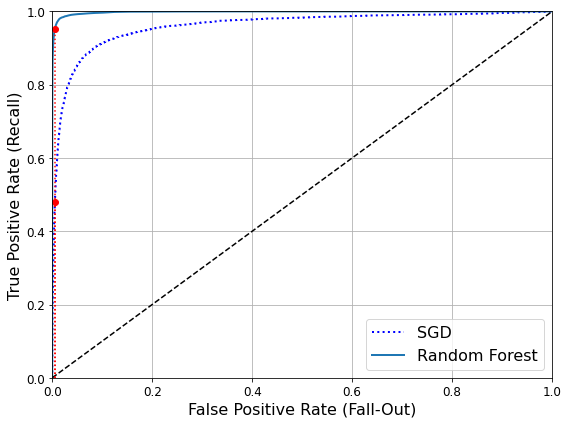

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
print("Dwie krzywe pełności na jednym wykresie dla obu klasyfikatorów")
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
print("Pole AUC wykresu pod krzywą ROC dla klasyfikatora RandomForestClassifier")
roc_auc_score(y_train_5, y_scores_forest)

Pole AUC wykresu pod krzywą ROC dla klasyfikatora RandomForestClassifier


0.9983436731328145

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print("Precyzja")
print(precision_score(y_train_5, y_train_pred_forest))
print("Pełność")
print(recall_score(y_train_5, y_train_pred_forest))

Precyzja
0.9905083315756169
Pełność
0.8662608374838591


# **Klasyfikacja wieloklasowa**

In [ ]:
print("Klasyfikator maszyny wektorów nośnych SVC. Moduł scikit-learn wykrywa czy zastosować")
print("strategię OvR czy OvO.")

from sklearn.svm import SVC


svm_clf = SVC(gamma="auto", random_state=42)
print("Najpierw wyucza klasyfikator SVC wobec zbioru uczącego za pomocą pierwotnych klas docelowych od 0 do 9")
print("y_train, a nie klas docelowych 5 przeciw reszcie y_train_5.")
print("Na github użył tylko 1000 pierwszych wierszy zamiast całego X_train i y_train.")
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
print("Wylicza prognozę dla some_digit = X[0]. Jest 5 tak jak miało być.")
svm_clf.predict([some_digit])

print()
print("Moduł sklearn skorzystał z OvO czyli wytrenował (10*9)/2=45 klasyfikatorów binarnych,")
print("uzyskał wyniki decyzyjne i wybrał klasę, która wygrała najwięcej pojedynków.")

Klasyfikator maszyny wektorów nośnych SVC. Moduł scikit-learn wykrywa czy zastosować
strategię OvR czy OvO.
Najpierw wyucza klasyfikator SVC wobec zbioru uczącego za pomocą pierwotnych klas docelowych od 0 do 9
y_train, a nie klas docelowych 5 przeciw reszcie y_train_5.
Na github użył tylko 1000 pierwszych wierszy zamiast całego X_train i y_train.
Wylicza prognozę dla some_digit = X[0]. Jest 5 tak jak miało być.

Moduł sklearn skorzystał z OvO czyli wytrenował (10*9)/2=45 klasyfikatorów binarnych,
uzyskał wyniki decyzyjne i wybrał klasę, która wygrała najwięcej pojedynków.


In [ ]:
print("Wywołanie funkcji decision_function na obrazie some_digit. Zwraca 10 wyników, po jednym na każdą klasę od 0 do 9.")
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)
print("Największy wynik jest dla szóstego wrazu, którym jest cyfra 5.")
print(np.argmax(some_digit_scores))
print("Wszystkie możliwe klasy")
print(svm_clf.classes_)
print("Wybranie klasy 5. Akurat ten wyraz ma klasę o nazwie 5, ale to przypadek.")
print(svm_clf.classes_[5])

Wywołanie funkcji decision_function na obrazie some_digit. Zwraca 10 wyników, po jednym na każdą klasę od 0 do 9.
[[ 2.81585438  7.09167958  3.82972099  0.79365551  5.8885703   9.29718395
   1.79862509  8.10392157 -0.228207    4.83753243]]
Największy wynik jest dla szóstego wrazu, którym jest cyfra 5.
5
Wszystkie możliwe klasy
[0 1 2 3 4 5 6 7 8 9]
Wybranie klasy 5. Akurat ten wyraz ma klasę o nazwie 5, ale to przypadek.
5


In [ ]:
print("Klasyfikator wieloklasowy na podstawie SVC przy użyciu strategii OvR")
from sklearn.multiclass import OneVsRestClassifier
print("Tworzy obiekt klasyfikatora")
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
print("Uczy klasyfikator")
ovr_clf.fit(X_train[:1000], y_train[:1000])
print("Przewiduje wynik dla some_digit")
print(ovr_clf.predict([some_digit]))
print("Ilość estymatorów")
print(len(ovr_clf.estimators_))

Klasyfikator wieloklasowy na podstawie SVC przy użyciu strategii OvR
Tworzy obiekt klasyfikatora
Uczy klasyfikator
Przewiduje wynik dla some_digit
[5]
Ilość estymatorów
10


In [ ]:
print("Wyucza klasyfikator SGDClassifier wobec zbioru uczącego za pomocą pierwotnych klas docelowych od 0 do 9")
print("y_train, a nie klas docelowych 5 przeciw reszcie y_train_5.")
print("Nie wdraża strategii OvO ani OvR,")
print("bo klasyfikatory SGD mogą klasyfikować przykłady w sposób wieloklasowy.")
print("Sam zmiejszyłem zbiór treningowy do 1000 próbek, żeby oszczędzić czas")
sgd_clf.fit(X_train[:1000], y_train[:1000])
sgd_clf.predict([some_digit])

Wyucza klasyfikator SGDClassifier wobec zbioru uczącego za pomocą pierwotnych klas docelowych od 0 do 9
y_train, a nie klas docelowych 5 przeciw reszcie y_train_5.
Nie wdraża strategii OvO ani OvR,
bo klasyfikatory SGD mogą klasyfikować przykłady w sposób wieloklasowy.
Sam zmiejszyłem zbiór treningowy do 1000 próbek, żeby oszczędzić czas


array([5], dtype=uint8)

In [ ]:
print("Metoda decision_function zwraca po jednej wartości na każdą klasę")
sgd_clf.decision_function([some_digit])
print("A więc największą wartość decyzyjnną ma czwarty element czyli liczba 3")

Metoda decision_function zwraca po jednej wartości na każdą klasę
A więc największą wartość decyzyjnną ma czwarty element czyli liczba 3


In [ ]:
print("Spr skuteczność (dokładność) SGDClassifier za pomocą sprawdzianu krzyżowego")
cross_val_score(sgd_clf, X_train[:1000], y_train[:1000], cv=3,scoring="accuracy")
print("Wynik powyżej 85% dla wszystich podzbiorów testowych. Korzystając z losowego klasyfikatora byłoby")
print("po 10%, bo bo dla każdej liczby od 0 do 9 szansa jest 10%.")

Spr skuteczność (dokładność) SGDClassifier za pomocą sprawdzianu krzyżowego
Wynik powyżej 85% dla wszystich podzbiorów testowych. Korzystając z losowego klasyfikatora byłoby
po 10%, bo bo dla każdej liczby od 0 do 9 szansa jest 10%.


In [ ]:
print("Większa dokładność po przeskalowaniu")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[:1000].astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train[:1000], cv=3, scoring="accuracy")

Większa dokładność po przeskalowaniu


array([0.83532934, 0.81681682, 0.82882883])

# **Analiza błędów**

In [ ]:
print("Wyliczam prognozy i macierz pomyłek")
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train[:1000], cv=3)
conf_mx = confusion_matrix(y_train[:1000], y_train_pred)
conf_mx
print("Na przykład drugi wiersz i siódma kolumna to 1, czyli rzeczywista cyfra 1 została")
print("pomylona z cyfrą 6 dokładnie 1 raz")

Wyliczam prognozy i macierz pomyłek
Na przykład drugi wiersz i siódma kolumna to 1, czyli rzeczywista cyfra 1 została
pomylona z cyfrą 6 dokładnie 1 raz


Graficzna interpretacja macierzy pomyłek
Sam to wywołuję


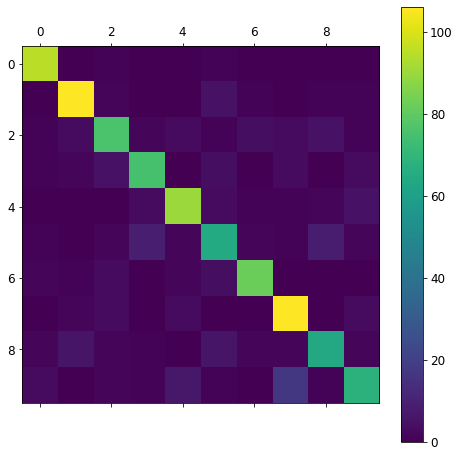

In [ ]:
print("Graficzna interpretacja macierzy pomyłek")
# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
print("Sam to wywołuję")
plot_confusion_matrix(conf_mx)

Saving figure confusion_matrix_plot


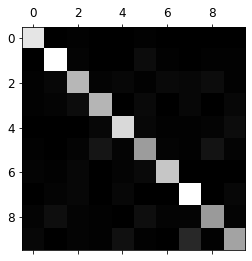

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [ ]:
print("Porównuję błędy poprzez podzielenie każdej wartości z macierzy pomyłek")
print("przez liczbę obrazów należących do danej klasy")
row_sums = conf_mx.sum(axis=1, keepdims=True)
print("row_sums =", row_sums)

print()
print("Mój sposób na sumowanie liczb w wierszach")
moje_row_sums = []
for row in conf_mx:
    row_sum = sum(row)
    moje_row_sums.append(row_sum)
print(moje_row_sums)

print()
norm_conf_mx = conf_mx / row_sums
print("norm_conf_mx", norm_conf_mx)

Porównuję błędy poprzez podzielenie każdej wartości z macierzy pomyłek
przez liczbę obrazów należących do danej klasy
row_sums = [[ 97]
 [116]
 [ 99]
 [ 93]
 [105]
 [ 92]
 [ 94]
 [117]
 [ 87]
 [100]]

Mój sposób na sumowanie liczb w wierszach
[97, 116, 99, 93, 105, 92, 94, 117, 87, 100]

norm_conf_mx [[0.97938144 0.         0.01030928 0.         0.         0.01030928
  0.         0.         0.         0.        ]
 [0.         0.9137931  0.01724138 0.         0.         0.04310345
  0.00862069 0.         0.00862069 0.00862069]
 [0.01010101 0.03030303 0.76767677 0.02020202 0.03030303 0.01010101
  0.04040404 0.03030303 0.05050505 0.01010101]
 [0.01075269 0.02150538 0.05376344 0.80645161 0.         0.04301075
  0.         0.03225806 0.         0.03225806]
 [0.         0.         0.         0.02857143 0.85714286 0.02857143
  0.00952381 0.00952381 0.01904762 0.04761905]
 [0.01086957 0.         0.02173913 0.09782609 0.02173913 0.70652174
  0.02173913 0.01086957 0.08695652 0.02173913]
 [0.0212

Wypełnia główną przekątną zerami, aby zostały same błędy.
Saving figure confusion_matrix_errors_plot


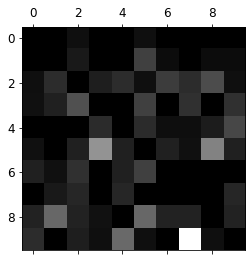

In [ ]:
print("Wypełnia główną przekątną zerami, aby zostały same błędy.")

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

X_aa to cyfry klasy cl_a dobrze prognozowane jako klasa cl_a
X_ab to cyfry klasy cl_a źle prognozowane jako klasa cl_b
X_ba to cyfry klasy cl_b źle prognozowane jako klasa cl_a
X_bb to cyfry klasy cl_b dobrze prognozowane jako klasa cl_b
len(y_train) = 60000
len(y_train_pred) = 1000
len(y_train_short) = 1000
len(X_train) = 60000
len(X_train_short) = 1000
Saving figure error_analysis_digits_plot


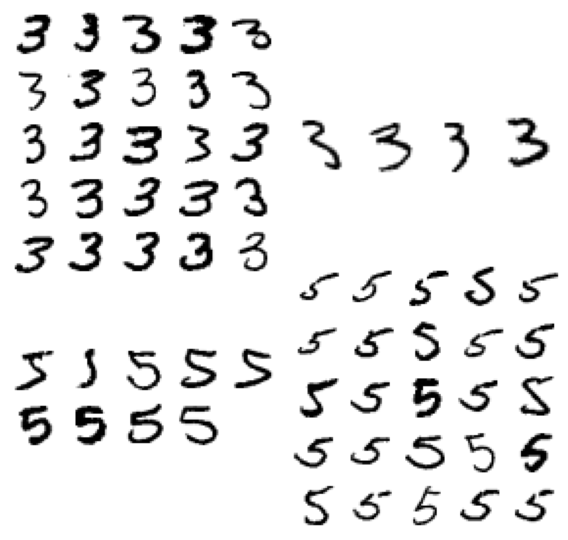

Nie wyszły kwadraty tak jak w książce, bo tylko 1000 próbek, więc było mało źle sklasyfikowanych.


In [ ]:
print("X_aa to cyfry klasy cl_a dobrze prognozowane jako klasa cl_a")
print("X_ab to cyfry klasy cl_a źle prognozowane jako klasa cl_b")
print("X_ba to cyfry klasy cl_b źle prognozowane jako klasa cl_a")
print("X_bb to cyfry klasy cl_b dobrze prognozowane jako klasa cl_b")

cl_a, cl_b = 3, 5
# X_aa = X_train[(y_train[:1000] == cl_a) & (y_train_pred[:1000] == cl_a)]
# X_ab = X_train[(y_train[:1000] == cl_a) & (y_train_pred[:1000] == cl_b)]
# X_ba = X_train[(y_train[:1000] == cl_b) & (y_train_pred[:1000] == cl_a)]
# X_bb = X_train[(y_train[:1000] == cl_b) & (y_train_pred[:1000] == cl_b)]

print("len(y_train) =", len(y_train))
print("len(y_train_pred) =", len(y_train_pred))

y_train_short = y_train[:1000]
print("len(y_train_short) =", len(y_train_short))

print("len(X_train) =", len(X_train))
X_train_short = X_train[:1000]
print("len(X_train_short) =", len(X_train_short))

X_aa = X_train_short[(y_train_short == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train_short[(y_train_short == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train_short[(y_train_short == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train_short[(y_train_short == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

print("Nie wyszły kwadraty tak jak w książce, bo tylko 1000 próbek, więc było mało źle sklasyfikowanych.")

# **Klasyfikacja wieloetykietowa**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("Zmieniłem wszędzie na [:1000], żeby oszczędzić czas.")
print("y_train_large to lista True-False, sprawdzająca czy element z y_train jest większy równy 7")
y_train_large = (y_train[:1000] >= 7)
print(y_train_large[:10])
print()
print("y_train_odd to lista True-False, sprawdzająca czy element z y_train jest nieparzysty")
y_train_odd = (y_train[:1000] % 2 == 1)
print(y_train_odd[:10])
print()
print("y_multilabel jest połączeniem y_train_large i y_train_odd w listę, której elementy są parami")
y_multilabel = np.c_[y_train_large, y_train_odd]
print(y_multilabel[:10])

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train[:1000], y_multilabel)

Zmieniłem wszędzie na [:1000], żeby oszczędzić czas.
y_train_large to lista True-False, sprawdzająca czy element z y_train jest większy równy 7
[False False False False  True False False False False False]

y_train_odd to lista True-False, sprawdzająca czy element z y_train jest nieparzysty
[ True False False  True  True False  True  True  True False]

y_multilabel jest połączeniem y_train_large i y_train_odd w listę, której elementy są parami
[[False  True]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("Prognoza dla some_digit.")
knn_clf.predict([some_digit])
print("Oznacza, że 5 nie jest większa równa 7 oraz że jest nieparzysta")

Prognoza dla some_digit.
Oznacza, że 5 nie jest większa równa 7 oraz że jest nieparzysta


In [ ]:
print("Średnia F1 dla wszystkich etykiet")

y_train_knn_pred = cross_val_predict(knn_clf, X_train[:1000], y_multilabel[:1000], cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

Średnia F1 dla wszystkich etykiet


0.8885424739016866

# **Klasyfikacja wielowyjściowa**

In [ ]:
print("Sam oswajam się z randint i argmax")
lista = []
amount_of_integers = 10
max_integer = 100
for i in range(amount_of_integers):
    liczba = np.random.randint(max_integer + 1)
    lista.append(liczba)
print("Losowa lista złożona z", amount_of_integers, "liczb z zakresu od 0 do", max_integer)
print(lista)
print("Największy element jest o indeksie", np.argmax(lista), "i wynosi on", lista[np.argmax(lista)])

print()
print("Losowa lista złożona z 15 liczb, każda od 20 do 40")
druga_lista = np.random.randint(20, 40, size=(3,5))
print(druga_lista)

Sam oswajam się z randint i argmax
Losowa lista złożona z 10 liczb z zakresu od 0 do 100
[51, 92, 14, 71, 60, 20, 82, 86, 74, 74]
Największy element jest o indeksie 1 i wynosi on 92

Losowa lista złożona z 15 liczb, każda od 20 do 40
[[23 27 22 21 31]
 [25 21 20 31 31]
 [36 29 35 34 34]]


In [ ]:
print("Każda cyfra ze zbioru X_train jest obrazem złożonym z 28*28=784 pikseli.")
print("Dla oszczędności czasu biorę początkowe 1000 cyfr.")
print("Tworzę szum do każdego z 1000x784=784000 pikseli z obrazów uczących się.")
noise_for_train = np.random.randint(0, 100, size=(len(X_train[:1000]), 784))
print("Ilość wierszów szumu", len(noise_for_train), "a w każdym wierszu", len(noise_for_train[0]), "liczb.")
print(noise_for_train)
print("Dodaję szum do każdego z obrazów uczących się.")
X_train_mod = X_train[:1000] + noise_for_train
print("Tworzę szum do każdego z 1000x784=784000 pikseli z obrazów testowych.")
noise_for_test = np.random.randint(0, 100, (len(X_test[:1000]), 784))
print("Ilość wierszów szumu", len(noise_for_test), "a w każdym wierszu", len(noise_for_test[0]), "liczb.")
print(noise_for_test)
print("Dodaję szum do każdego z obrazów testowych")
X_test_mod = X_test[:1000] + noise_for_test

print("Jako etykiety przypisuję oryginalne dane uczące i testowe (one będą targetami)")
y_train_mod = X_train[:1000]
y_test_mod = X_test[:1000]

Każda cyfra ze zbioru X_train jest obrazem złożonym z 28*28=784 pikseli.
Dla oszczędności czasu biorę początkowe 1000 cyfr.
Tworzę szum do każdego z 1000x784=784000 pikseli z obrazów uczących się.
Ilość wierszów szumu 1000 a w każdym wierszu 784 liczb.
[[61 50 54 ... 73 82 16]
 [84 77 72 ...  2 36 42]
 [39 89 54 ... 34  7 15]
 ...
 [60 85 22 ... 41 11 35]
 [67 36 64 ... 68 51  5]
 [14  3 53 ... 64 89 68]]
Dodaję szum do każdego z obrazów uczących się.
Tworzę szum do każdego z 1000x784=784000 pikseli z obrazów testowych.
Ilość wierszów szumu 1000 a w każdym wierszu 784 liczb.
[[93 17 96 ... 13 82 62]
 [96 80 95 ... 57  8 62]
 [42 72 95 ... 60 12 67]
 ...
 [99 85 74 ... 19 20 69]
 [75 19 21 ... 15 97 25]
 [55 63 20 ... 28 90 64]]
Dodaję szum do każdego z obrazów testowych
Jako etykiety przypisuję oryginalne dane uczące i testowe (one będą targetami)


Po lewej zaszumiony obraz z X_test_mod, a po prawej odszumiony obraz z y_test_mode
Saving figure noisy_digit_example_plot


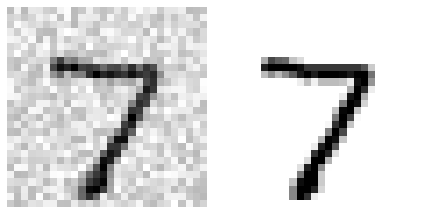

In [ ]:
print("Po lewej zaszumiony obraz z X_test_mod, a po prawej odszumiony obraz z y_test_mode")
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Wyuczamy klasyfikator.
Oczyszczamy obraz


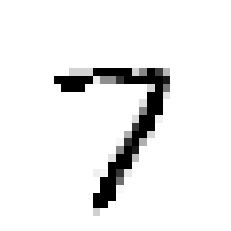

In [ ]:
print("Wyuczamy klasyfikator.")
knn_clf.fit(X_train_mod, y_train_mod)
print("Oczyszczamy obraz")
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

# **Extra material**

## **Dummy (ie. random) classifier**

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb

print("Całkowicie losowy klasyfikator str 117")
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier(strategy="prior")
y_probas_dmy = cross_val_predict(dmy_clf, X_train[:1000], y_train_5[:1000], cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

Całkowicie losowy klasyfikator str 117


In [ ]:
print("Pierwsza liczba to p-two, że nie próbka nie jest klasy 5, a druga liczba że jest klasy 5")
print("y_probas_dmy") 
print(y_probas_dmy)
print()
print("Drugie liczby z każdego wiersza")
print("y_scores_dmy")
print(y_scores_dmy)

Pierwsza liczba to p-two, że nie próbka nie jest klasy 5, a druga liczba że jest klasy 5
y_probas_dmy
[[0.90840841 0.09159159]
 [0.90840841 0.09159159]
 [0.90840841 0.09159159]
 ...
 [0.90704648 0.09295352]
 [0.90704648 0.09295352]
 [0.90704648 0.09295352]]

Drugie liczby z każdego wiersza
y_scores_dmy
[0.09159159 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159
 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159
 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159
 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159
 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159
 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159
 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159
 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159
 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159
 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159 0.09159159
 0.09159159 0.09159159 0.0

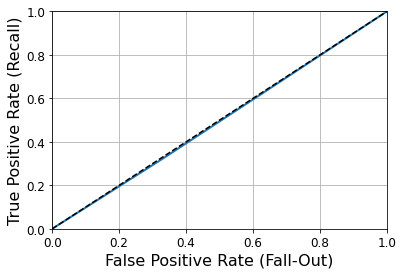

In [ ]:
fprr, tprr, thresholdsr = roc_curve(y_train_5[:1000], y_scores_dmy)
plot_roc_curve(fprr, tprr)

## **KNN classifier**

In [ ]:
print("Klasyfikator KNN")
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train[:1000], y_train[:1000])

Klasyfikator KNN


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(X_test[:1000])

In [ ]:
print(len(y_knn_pred))
print(y_knn_pred)

1000
[7 2 1 0 4 1 9 9 6 7 0 6 9 0 1 3 9 7 3 4 9 6 6 5 9 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 1 5 5 1 2 4 4 6 3 5 5 0 0 4 1 9 1 7 2 4 9 7 9 0 4 3 0 7 0 0 7
 1 7 3 2 9 7 9 6 2 7 8 4 7 3 6 1 3 6 9 3 1 9 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 9 4 4 9 7 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 1 9 9 5 5 1 5 6 0 3 1 4 6 5 4 6 5 4 5 1 9 4 7 2 3 2 1 1 8 1 8 1 2 5 0 2
 9 2 5 0 1 1 1 0 9 0 1 1 6 9 2 3 6 1 1 1 3 9 5 2 9 4 9 9 3 9 0 3 5 5 5 7 3
 2 7 1 2 8 4 1 7 5 3 8 7 7 7 2 1 4 1 5 9 8 7 1 5 0 6 4 2 9 1 9 5 7 7 2 1 2
 6 8 1 7 7 9 1 0 1 3 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8 1 7 1 7 9 0 2 7 4 1 3 0 0 5 1 9 6 5 0 5 1 7 9 3 0 9 6 0 7 1 1 2 1
 5 3 2 9 7 5 6 5 5 1 3 8 1 0 5 1 9 1 5 0 6 1 8 5 1 7 9 4 6 7 2 5 0 6 5 6 3
 7 2 0 8 8 5 9 1 1 4 0 2 3 7 6 1 6 2 1 9 2 8 6 1 9 5 1 5 4 4 2 8 5 7 2 4 5
 0 3 1 7 7 3 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 7 8 3 7 6 0 0 3 6
 2 0 6 9 9 3 3 3 1 5 9 1 1 6 8 0 9 6 6 6 7 8 8 2 7 5 8 9 6 1 8 4 1 2 6 3 1
 9 7 5 4 0 9 9 7 1 0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test[:1000], y_knn_pred)

0.827

Tego nie rozumiem.


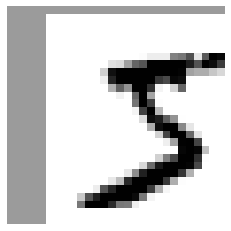

In [ ]:
print("Tego nie rozumiem.")
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [ ]:
print("Dalej nie robiłem")

Dalej nie robiłem


# **Exercise solutions**

## **1. An MNIST Classifier With Over 97% Accuracy¶**

In [ ]:
print("Warning: the next cell may take hours to run, depending on your hardware.")

from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

# knn_clf = KNeighborsClassifier()
# grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
# grid_search.fit(X_train, y_train)

In [ ]:
# grid_search.best_params_

In [ ]:
# grid_search.best_score_

In [ ]:
# from sklearn.metrics import accuracy_score

# y_pred = grid_search.predict(X_test)
# accuracy_score(y_test, y_pred)

## **2. Data Augmentation**

In [ ]:
print("Sam oswajam się z funkcją reshape zmieniającą rozmiar tablicy")
tablica_do_zmiany = np.array((3,7,2,5,0,8))
print("tablica_do_zmiany")
print(tablica_do_zmiany)
tablica_3_na_2 = tablica_do_zmiany.reshape((3,2))
print()
print("tablica_3_na_2")
print(tablica_3_na_2)

Sam oswajam się z funkcją reshape zmieniającą rozmiar tablicy
tablica_do_zmiany
[3 7 2 5 0 8]

tablica_3_na_2
[[3 7]
 [2 5]
 [0 8]]


In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    # W tym przypadku [-1] wartość jest wywnioskowana z długości tablicy i pozostałych wymiarów.
    return shifted_image.reshape([-1])

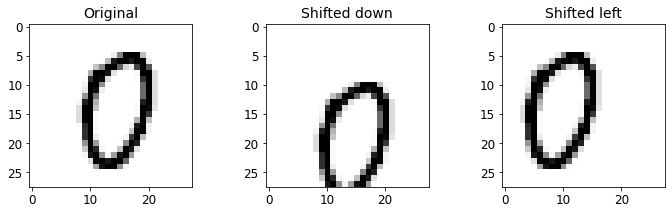

In [ ]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
X_train_augmented = [image for image in X_train]
print(X_train_augmented)
y_train_augmented = [label for label in y_train]
print(y_train_augmented)

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

# z dwóch list robi dwie tablice ndarray
X_train_augmented = np.array(X_train_augmented)

print(len(X_train_augmented))
y_train_augmented = np.array(y_train_augmented)
print(len(y_train_augmented))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



300000
300000


In [ ]:
# miesza indeksy od 0 do 300000
shuffle_idx = np.random.permutation(len(X_train_augmented))
print(shuffle_idx)
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

[275890 258290  31922 ... 125669 120374  68883]


In [ ]:
# długo zajmie
# knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
# długo zajmie
# knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
# y_pred = knn_clf.predict(X_test)
# accuracy_score(y_test, y_pred)
print("By simply augmenting the data, we got a 0.5% accuracy boost. :)")

By simply augmenting the data, we got a 0.5% accuracy boost. :)


## **3. Tackle the Titanic dataset**

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

First, login to Kaggle and go to the Titanic challenge to download train.csv and test.csv. Save them to the datasets/titanic directory.

Next, let's load the data:

In [ ]:
import os

TITANIC_PATH = os.path.join("datasets", "titanic")

In [ ]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    # te dwie linijki wziąłem z kodu z rozdziału 2 (początek)
    if not os.path.isdir(titanic_path):
        os.makedirs(titanic_path)
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [ ]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

The data is already split into a training set and a test set. However, the test data does not contain the labels: your goal is to train the best model you can using the training data, then make your predictions on the test data and upload them to Kaggle to see your final score.

Let's take a peek at the top few rows of the training set:

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The attributes have the following meaning:

Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.

Pclass: passenger class.

Name, Sex, Age: self-explanatory

SibSp: how many siblings & spouses of the passenger aboard the Titanic.

Parch: how many children & parents of the passenger aboard the Titanic.

Ticket: ticket id

Fare: price paid (in pounds)

Cabin: passenger's cabin number

Embarked: where the passenger embarked the Titanic

Let's get more info to see how much data is missing:

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Okay, the Age, Cabin and Embarked attributes are sometimes null (less than 891 non-null), especially the Cabin (77% are null). We will ignore the Cabin for now and focus on the rest. The Age attribute has about 19% null values, so we will need to decide what to do with them. Replacing null values with the median age seems reasonable.

The Name and Ticket attributes may have some value, but they will be a bit tricky to convert into useful numbers that a model can consume. So for now, we will ignore them.

Let's take a look at the numerical attributes:

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Yikes, only 38% Survived. :( That's close enough to 40%, so accuracy will be a reasonable metric to evaluate our model.

The mean Fare was £32.20, which does not seem so expensive (but it was probably a lot of money back then).

The mean Age was less than 30 years old.

Let's check that the target is indeed 0 or 1:

In [ ]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Now let's take a quick look at all the categorical attributes:

In [ ]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

Note: the code below uses a mix of Pipeline, FeatureUnion and a custom DataFrameSelector to preprocess some columns differently. Since Scikit-Learn 0.20, it is preferable to use a ColumnTransformer, like in the previous chapter.

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

Now let's build our preprocessing pipelines. We will reuse the DataframeSelector we built in the previous chapter to select specific attributes from the DataFrame:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

print("Niestandardowy transformator. Tak jak w pliku 02 ##Niestandardowe transformatory.")
print("On bierze nazwy atrybutów (featusres) i zwraca DataFrame z tymi atrybutami.")
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Niestandardowy transformator. Tak jak w pliku 02 ##Niestandardowe transformatory.
On bierze nazwy atrybutów (featusres) i zwraca DataFrame z tymi atrybutami.


Let's build the pipeline for the numerical attributes:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")), # w miejsca puste wstawi medianę w każdej kolumnie
    ])

In [ ]:
print("Kolumny to: Age, SibSp, Parch, Fare. Puste miejsca zostały wypełnione medianą z danej kolumny")
num_pipeline.fit_transform(train_data)

Kolumny to: Age, SibSp, Parch, Fare. Puste miejsca zostały wypełnione medianą z danej kolumny


array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

We will also need an imputer for the string categorical columns (the regular SimpleImputer does not work on those):

In [ ]:
# Inspired from stackoverflow.com/questions/25239958
print("Myślę, że on będzie wstawiał w puste miejsca te wartości które pojawiały się najczęściej")
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

Myślę, że on będzie wstawiał w puste miejsca te wartości które pojawiały się najczęściej


In [ ]:
from sklearn.preprocessing import OneHotEncoder

Now we can build the pipeline for the categorical attributes:

In [ ]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),  # nie chcemy macierzy rzadkiej więc sparse=False
    ])

In [ ]:
print("Wszystkie wiersze z danych kategorialnych")
cat_pipeline.fit_transform(train_data)

Wszystkie wiersze z danych kategorialnych


array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
print("Sam rozpracowałem pierwszy wiersz z danych kategorialnych")

print(cat_pipeline.fit_transform(train_data)[0])

print("Miejsca od pierwszego do trzeciego oznaczają klasę pasażera.")
print("Jedynka na trzecim miejscu oznacza, że podróżował 3 klasą.")
print("Miejsca od 4 do 5 oznaczają płeć.")
print("Jedynka na piątym miejscu oznacza male.")
print("Miejsca od 6 do 8 oznaczają embarked czyli gdzie wsiedli.")
print("Jedynka na 8 miejscu oznacza Southampton")

Sam rozpracowałem pierwszy wiersz z danych kategorialnych
[0. 0. 1. 0. 1. 0. 0. 1.]
Miejsca od pierwszego do trzeciego oznaczają klasę pasażera.
Jedynka na trzecim miejscu oznacza, że podróżował 3 klasą.
Miejsca od 4 do 5 oznaczają płeć.
Jedynka na piątym miejscu oznacza male.
Miejsca od 6 do 8 oznaczają embarked czyli gdzie wsiedli.
Jedynka na 8 miejscu oznacza Southampton


Finally, let's join the numerical and categorical pipelines:

In [ ]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])


Cool! Now we have a nice preprocessing pipeline that takes the raw data and outputs numerical input features that we can feed to any Machine Learning model we want.



In [ ]:
X_train = preprocess_pipeline.fit_transform(train_data)
print("Całe X_train")
X_train

Całe X_train


array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [ ]:
print("Sam zinterpretuję pierwszy wiersz.")
print(X_train[0])
print("Age 22 lata. SibSp 1. Parch 0. Fare 7,25 funta. Klasa 3. Płeć male. Stacja Southampton.")

Sam zinterpretuję pierwszy wiersz.
[22.    1.    0.    7.25  0.    0.    1.    0.    1.    0.    0.    1.  ]
Age 22 lata. SibSp 1. Parch 0. Fare 7,25 funta. Klasa 3. Płeć male. Stacja Southampton.


Let's not forget to get the labels:

In [ ]:
y_train = train_data["Survived"]
print(y_train)
print(type(y_train))

print()
print("Sam wyświetlam w postaci DataFrame")
moje_y_train_jako_df = pd.DataFrame(y_train)
print(moje_y_train_jako_df)
print(type(moje_y_train_jako_df))

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
<class 'pandas.core.series.Series'>

Sam wyświetlam w postaci DataFrame
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


We are now ready to train a classifier. Let's start with an SVC:

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Great, our model is trained, let's use it to make predictions on the test set:

In [ ]:
print("Metoda transform a nie fit_transform tak jak dla X_train")
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

Metoda transform a nie fit_transform tak jak dla X_train


And now we could just build a CSV file with these predictions (respecting the format expected by Kaggle), then upload it and hope for the best. But wait! We can do better than hope. Why don't we use cross-validation to have an idea of how good our model is?

In [ ]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()  # średnia z wyników kroswalidacji

0.7329588014981274

In [ ]:
print("Wszystkie wyniki kroswalidacji")
print(svm_scores)

Wszystkie wyniki kroswalidacji
[0.66666667 0.66292135 0.71910112 0.74157303 0.76404494 0.71910112
 0.7752809  0.73033708 0.74157303 0.80898876]


Okay, over 73% accuracy, clearly better than random chance, but it's not a great score. Looking at the leaderboard for the Titanic competition on Kaggle, you can see that you need to reach above 80% accuracy to be within the top 10% Kagglers. Some reached 100%, but since you can easily find the list of victims of the Titanic, it seems likely that there was little Machine Learning involved in their performance! ;-) So let's try to build a model that reaches 80% accuracy.

Let's try a RandomForestClassifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126466916354558

That's much better!

Instead of just looking at the mean accuracy across the 10 cross-validation folds, let's plot all 10 scores for each model, along with a box plot highlighting the lower and upper quartiles, and "whiskers" showing the extent of the scores (thanks to Nevin Yilmaz for suggesting this visualization). Note that the boxplot() function detects outliers (called "fliers") and does not include them within the whiskers. Specifically, if the lower quartile is $Q_1$ and the upper quartile is $Q_3$, then the interquartile range $IQR = Q_3 - Q_1$ (this is the box's height), and any score lower than $Q_1 - 1.5 \times IQR$ is a flier, and so is any score greater than $Q3 + 1.5 \times IQR$.

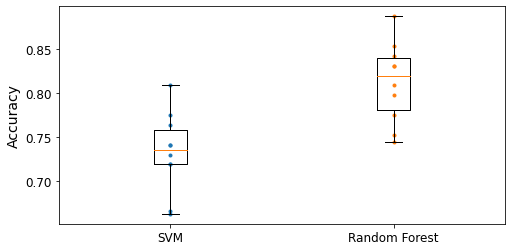

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()


To improve this result further, you could:

Compare many more models and tune hyperparameters using cross validation and grid search,
Do more feature engineering, for example:
replace SibSp and Parch with their sum,
try to identify parts of names that correlate well with the Survived attribute (e.g. if the name contains "Countess", then survival seems more likely),
try to convert numerical attributes to categorical attributes: for example, different age groups had very different survival rates (see below), so it may help to create an age bucket category and use it instead of the age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived (see below).

In [ ]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()  # średnia z wartości 0 i 1

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [ ]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [ ]:
print("Trenuję groupby")
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]}, 
                  index=[1,2,3,4])

Trenuję groupby


In [ ]:
df

,Animal,Max Speed
1,Falcon,380.0
2,Falcon,370.0
3,Parrot,24.0
4,Parrot,26.0


In [ ]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


# **4. Spam classifier**

First, let's fetch the data:

In [ ]:
import os
import tarfile
import urllib.request # zmieniłem bo było tylko urllib i rzucał że nie ma tego modułu

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [ ]:
fetch_spam_data()

Next, let's load all the emails:

In [ ]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [ ]:
len(ham_filenames)

2500

In [ ]:
len(spam_filenames)

500

We can use Python's email module to parse these emails (this handles headers, encoding, and so on):

In [ ]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [ ]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

Let's look at one example of ham and one example of spam, to get a feel of what the data looks like:

In [ ]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [ ]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [ ]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [ ]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [ ]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [ ]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

It seems that the ham emails are more often plain text, while spam has quite a lot of HTML. Moreover, quite a few ham emails are signed using PGP, while no spam is. In short, it seems that the email structure is useful information to have.

Now let's take a look at the email headers:

In [ ]:
for header, value in spam_emails[0].items():
    print(header,":",value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu